In [1]:
import pandas as pd

In [2]:
sfoc1 = pd.read_csv("sfoc_combined_1.csv")
sfoc2 = pd.read_csv("sfoc_combined_2.csv")

In [3]:
import plotly.express as px

fig = px.line(sfoc1[:50000], y="SFOC")
fig.show()

In [4]:
sfoc1.loc[sfoc1["SFOC"]>100].nsmallest(n=191, columns=["SFOC", "Engine Load"])

,Engine Load,SFOC
112250,0.700,183.0
415111,0.700,183.0
417074,0.700,183.0
417114,0.700,183.0
165776,0.701,183.0
...,...,...
165761,0.787,183.0
8079,0.792,183.0
8071,0.795,183.0
8070,0.796,183.0


In [5]:
sfoc2.sample(20)

,Engine Load,SFOC
47092,0.000,0.00
437718,0.000,0.00
13154,0.000,0.00
116108,0.134,204.96
360282,0.136,204.96
252585,0.114,204.96
220097,0.000,0.00
186249,0.125,204.96
252944,0.137,204.96
53610,0.135,204.96


In [6]:
sfoc1

,Engine Load,SFOC
0,0.000,0.00
1,0.000,0.00
2,0.000,0.00
3,0.000,0.00
4,0.000,0.00
...,...,...
443247,0.119,204.96
443248,0.119,204.96
443249,0.127,204.96
443250,0.127,204.96


In [7]:
uipa1 = pd.read_csv("UIPA.HMD8310H.Engine1.csv")
uipa2 = pd.read_csv("UIPA.HMD8310H.Engine2.csv")

/tmp/ipykernel_5502/1830310476.py:1: DtypeWarning:

Columns (152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386

In [8]:
sfoc1["time"] = uipa1["time"]

In [9]:
sfoc2["time"] = uipa2["time"]

In [10]:
merged_df = pd.merge(sfoc1, sfoc2, on='time', how='inner')

<Axes: >

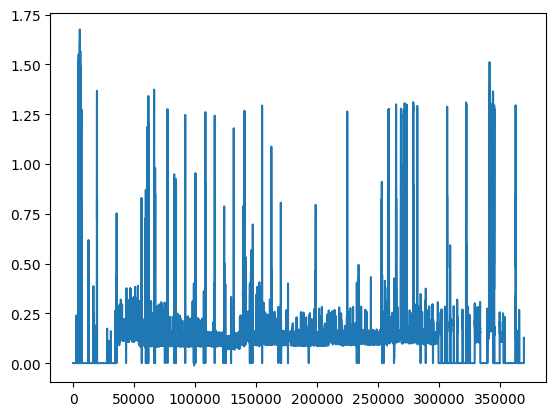

In [11]:
merged_df["total_load"] = merged_df["Engine Load_x"]+merged_df["Engine Load_y"]
merged_df["total_load"].plot()

In [12]:
battery_data = pd.read_csv("EP_Battery.Thing_HMD8310.csv")

/tmp/ipykernel_5502/4261599124.py:1: DtypeWarning:

Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,108) have mixed types. Specify dtype option on import or set low_memory=False.



In [13]:
final_df = pd.merge(merged_df, battery_data, on='time', how='inner')

In [14]:
final_df.isna().sum().sort_values(ascending=False)[:5]

BATT_PACK_1_FAULT      5346
BATT_PACK_1_WARN       5341
BATT_PACK_6_DISCONN    5145
BATT_PACK_2_DISCONN    5140
BATT_PACK_7_FAULT      5139
dtype: int64

In [15]:
final_df.dropna(inplace=True)
final_df.reset_index(drop=True, inplace=True)

<Axes: >

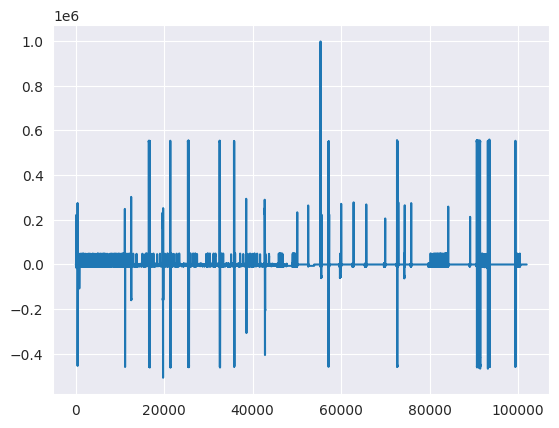

In [16]:
import seaborn as sns
sns.set_style('darkgrid')
final_df["batt_load"] = final_df["Voltage"]*final_df["Current"]
final_df["batt_load"].plot()

<Axes: >

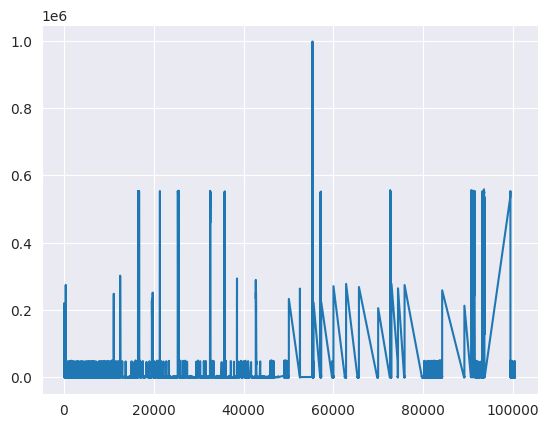

In [17]:
positive_power = final_df.loc[final_df["batt_load"]>0].copy()
positive_power["batt_load"].plot()

In [18]:
positive_power.reset_index(drop=True, inplace=True)

<Axes: >

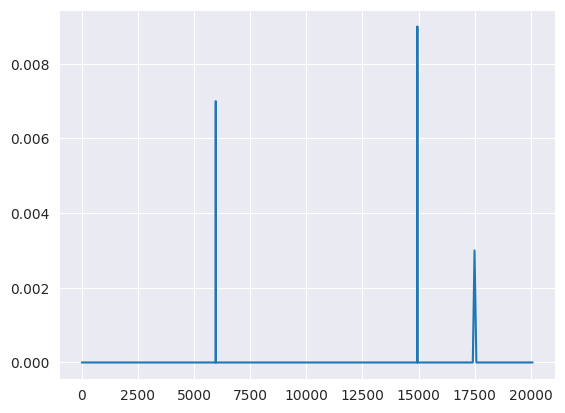

In [19]:
(positive_power.loc[positive_power["Engine Load_x"]<0.01, "Engine Load_x"]).plot()

<Axes: >

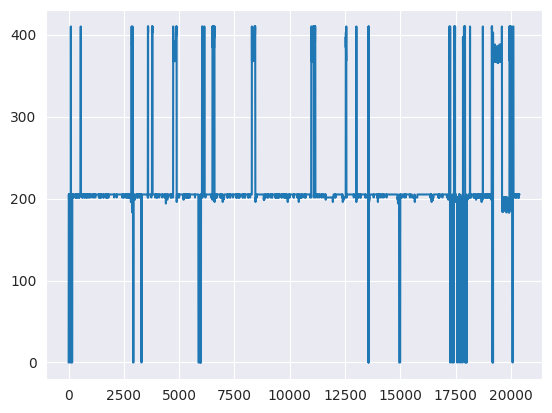

In [20]:
(positive_power["SFOC_x"]+positive_power["SFOC_y"]).plot()

<Axes: >

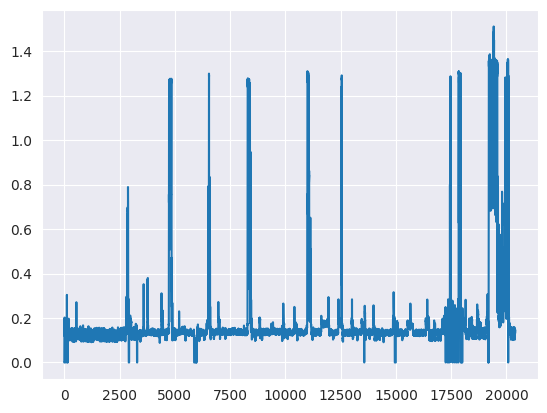

In [21]:
(positive_power["Engine Load_x"]+positive_power["Engine Load_y"]).plot()

<Axes: >

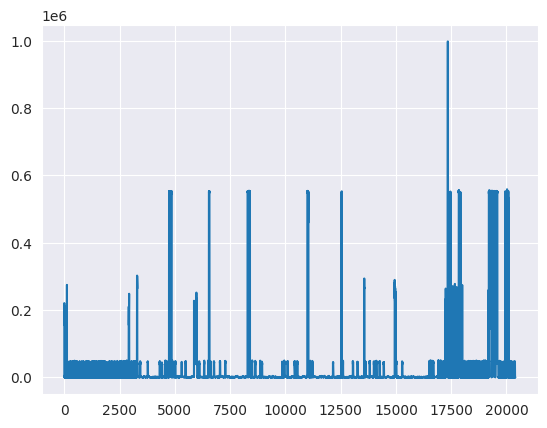

In [22]:
(positive_power["batt_load"]).plot()

In [23]:
def transform_to_percentage(value, max_value=1750000):
    percentage = (value / max_value) * 100
    return percentage

positive_power["batt_load_perc"] = transform_to_percentage(positive_power["batt_load"])
positive_power.loc[positive_power["batt_load_perc"]>50, "batt_load_perc"] = 50
positive_power["batt_load_perc"] /= 100

<Axes: >

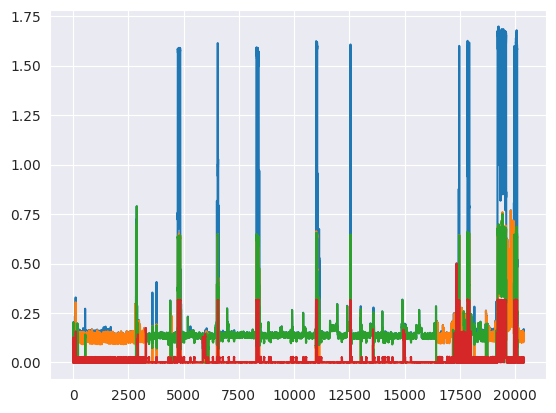

In [31]:
positive_power["total_load"] = positive_power["Engine Load_x"] + positive_power["Engine Load_y"] + positive_power["batt_load_perc"]
positive_power["total_load"].plot()
positive_power["Engine Load_x"].plot()
positive_power["Engine Load_y"].plot()
positive_power["batt_load_perc"].plot()

In [32]:
def rule_based_power_split(total_load, max_batt_load, efficient_engine_load,
                           max_engine_plus_battery_load, max_two_engines_load,
                           max_two_engines_plus_battery_load):
    # Loads are given in percentage. Total load can be up to 200%
    engine1_load = 0
    engine2_load = 0
    batt_load = 0
    if total_load <= max_batt_load:        
        batt_load = total_load
    elif (total_load > max_batt_load) and (total_load <= efficient_engine_load):
        engine1_load = total_load
    elif (total_load > efficient_engine_load) and (total_load <= max_engine_plus_battery_load):
        engine1_load = efficient_engine_load
        batt_load = total_load - efficient_engine_load
    elif (total_load > max_engine_plus_battery_load) and (total_load <= max_two_engines_load):
        engine1_load = total_load/2
        engine2_load = total_load/2
    elif (total_load > max_two_engines_load) and (total_load <= max_two_engines_plus_battery_load):
        engine1_load = efficient_engine_load
        engine2_load = efficient_engine_load
        batt_load = total_load - engine1_load - engine2_load
    return engine1_load, engine2_load, batt_load, total_load

MAX_BATT_LOAD = 0.5
EFFICIENT_ENGINE_LOAD = 0.75
MAX_ENGINE_PLUS_BATTERY_LOAD = 1.25
MAX_TWO_ENGINES_LOAD = 1.5
MAX_TWO_ENGINES_PLUS_BATTERY_LOAD = 2

# Apply the function to each row in the 'total_load' column and create a new DataFrame
loads_df = positive_power['total_load'].apply(lambda x: rule_based_power_split(
    x, MAX_BATT_LOAD, EFFICIENT_ENGINE_LOAD, MAX_ENGINE_PLUS_BATTERY_LOAD, 
    MAX_TWO_ENGINES_LOAD, MAX_TWO_ENGINES_PLUS_BATTERY_LOAD)
)

In [33]:
# Convert the series of tuples into a DataFrame
loads_df = loads_df.apply(pd.Series)
loads_df.columns = ['engine1_load', 'engine2_load', 'opt_batt_load', 'total_load']

# Concatenate the new DataFrame with the original merged_df
optimized_df = positive_power.copy()
optimized_df = pd.concat([optimized_df, loads_df], axis=1)

In [34]:
print(optimized_df.loc[optimized_df["engine1_load"]>0, "engine1_load"].mean())
positive_power.loc[positive_power["Engine Load_x"]>0, "Engine Load_x"].mean()

0.7252847214148284


0.2080682172741455

In [35]:
print(optimized_df.loc[optimized_df["engine2_load"]>0, "engine2_load"].mean())
positive_power.loc[positive_power["Engine Load_y"]>0, "Engine Load_y"].mean()

0.7490815752333604


0.16823259014588496

In [97]:
print(optimized_df.loc[optimized_df["opt_batt_load"]>0, "opt_batt_load"].mean())

0.1460533897390182


In [98]:
print(optimized_df.loc[optimized_df["batt_load_perc"]>0, "batt_load_perc"].mean())

0.016846830703837773


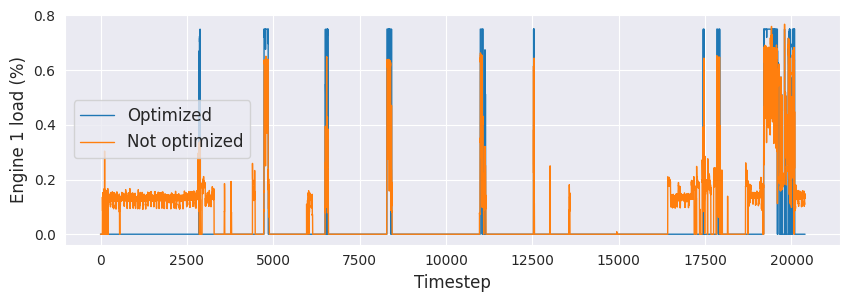

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=((10, 3)))
optimized_df["engine1_load"].plot(linewidth=1)
positive_power["Engine Load_x"].plot(linewidth=1)
# optimized_df.loc[3000:5000, "opt_batt_load"].plot(linewidth=0.7)
plt.legend(["Optimized", "Not optimized"], fontsize=12)
plt.xticks(fontsize=10)  # Adjust x-ticks font size
plt.yticks(fontsize=10)  # Adjust y-ticks font size
plt.xlabel('Timestep', fontsize=12)
_ = plt.ylabel('Engine 1 load (%)', fontsize=12)

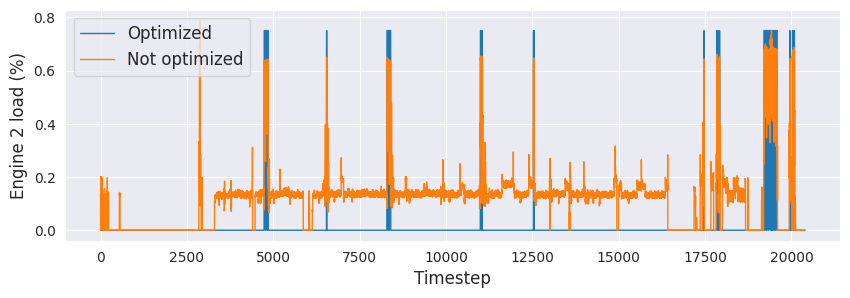

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=((10, 3)))
optimized_df["engine2_load"].plot(linewidth=1)
positive_power["Engine Load_y"].plot(linewidth=1)
# optimized_df.loc[3000:5000, "opt_batt_load"].plot(linewidth=0.7)
plt.legend(["Optimized", "Not optimized"], fontsize=12)
plt.xticks(fontsize=10)  # Adjust x-ticks font size
plt.yticks(fontsize=10)  # Adjust y-ticks font size
plt.xlabel('Timestep', fontsize=12)
_ = plt.ylabel('Engine 2 load (%)', fontsize=12)

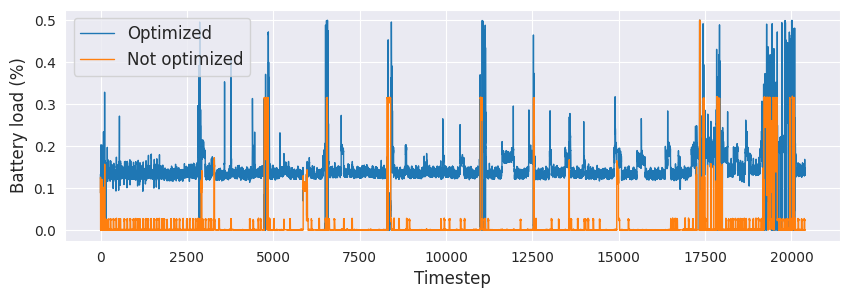

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=((10, 3)))
optimized_df["opt_batt_load"].plot(linewidth=1)
positive_power["batt_load_perc"].plot(linewidth=1)
# optimized_df.loc[3000:5000, "opt_batt_load"].plot(linewidth=0.7)
plt.legend(["Optimized", "Not optimized"], fontsize=12)
plt.xticks(fontsize=10)  # Adjust x-ticks font size
plt.yticks(fontsize=10)  # Adjust y-ticks font size
plt.xlabel('Timestep', fontsize=12)
_ = plt.ylabel('Battery load (%)', fontsize=12)

In [39]:
sfoc_MAN = pd.read_csv("sfoc_MAN_curve.csv")
sfoc_MAN

,Relative Fuel Consumption Rate,Engine Load
0,1.1200,0.10
1,1.1000,0.15
2,1.0850,0.20
3,1.0700,0.25
4,1.0600,0.30
5,1.0500,0.35
6,1.0350,0.40
7,1.0250,0.45
8,1.0200,0.50
9,1.0100,0.55


In [40]:
import pandas as pd
import numpy as np

# Assuming fuel_consumption_df and engine_load_df are your DataFrames

# Function to round to the nearest multiple of 0.05
def round_to_nearest(x, base=0.05):
    return round(base * round(x/base), 2)

# Apply the rounding function to the 'Engine Load' column
engine1 = optimized_df.copy()
engine1['engine1_load'] = engine1['engine1_load'].apply(lambda x: round_to_nearest(x))
engine1.rename(columns={'engine1_load': 'Engine Load'}, inplace=True)

engine2 = optimized_df.copy()
engine2['engine2_load'] = engine2['engine2_load'].apply(lambda x: round_to_nearest(x))
engine2.rename(columns={'engine2_load': 'Engine Load'}, inplace=True)

engine1['Engine Load'] = engine1['Engine Load'].astype(float)
engine2['Engine Load'] = engine2['Engine Load'].astype(float)
sfoc_MAN['Engine Load'] = sfoc_MAN['Engine Load'].astype(float)

# Merge the DataFrames on the 'Engine Load' column
merged_engine1 = pd.merge(engine1, sfoc_MAN, on='Engine Load', how='left')
merged_engine2 = pd.merge(engine2, sfoc_MAN, on='Engine Load', how='left')

# merged_df now contains the engine load data (rounded) along with the corresponding relative fuel consumption rates

In [41]:
print("Unique values in fuel_consumption_df:", engine1['Engine Load'].unique())
print("Unique values in engine_load_df after rounding:", sfoc_MAN['Engine Load'].unique())

Unique values in fuel_consumption_df: [0.   0.65 0.7  0.55 0.75 0.5  0.6 ]
Unique values in engine_load_df after rounding: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.9  0.95 1.  ]


In [42]:
merged_engine1.fillna(0, inplace=True)
merged_engine2.fillna(0, inplace=True)

In [70]:
merged_engine1["sfoc"] = merged_engine1["Relative Fuel Consumption Rate"] * 183
merged_engine2["sfoc"] = merged_engine2["Relative Fuel Consumption Rate"] * 183

In [71]:
print((merged_engine1.loc[merged_engine1["sfoc"]>0, ["sfoc"]]).mean())
positive_power.loc[positive_power["SFOC_x"]>0, ["SFOC_x"]].mean()

sfoc    183.219804
dtype: float64


SFOC_x    201.057592
dtype: float64

In [72]:
print((merged_engine2.loc[merged_engine2["sfoc"]>0, ["sfoc"]]).mean())
positive_power.loc[positive_power["SFOC_y"]>0, ["SFOC_y"]].mean()

sfoc    183.00195
dtype: float64


SFOC_y    203.036403
dtype: float64

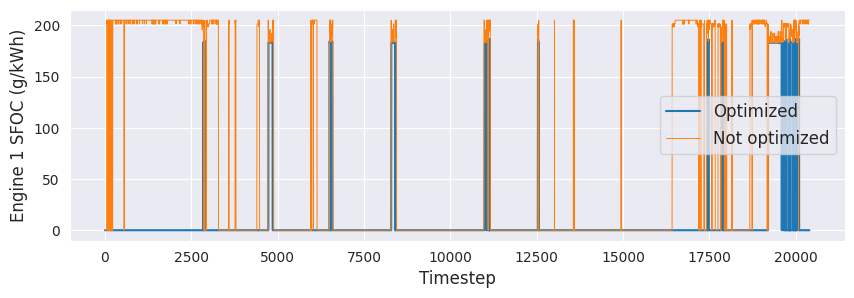

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=((10,3 )))
merged_engine1["sfoc"].plot()
positive_power["SFOC_x"].plot(linewidth=0.7)

plt.legend(["Optimized", "Not optimized"], fontsize=12)
plt.xticks(fontsize=10)  # Adjust x-ticks font size
plt.yticks(fontsize=10)  # Adjust y-ticks font size
plt.xlabel('Timestep', fontsize=12)
_ = plt.ylabel('Engine 1 SFOC (g/kWh)', fontsize=12)

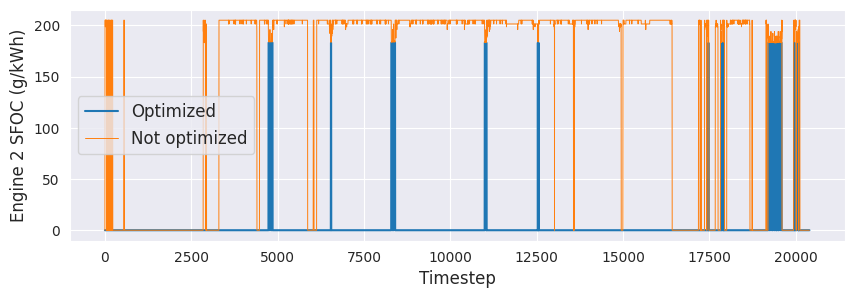

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=((10,3 )))
merged_engine2["sfoc"].plot()
positive_power["SFOC_y"].plot(linewidth=0.7)

plt.legend(["Optimized", "Not optimized"], fontsize=12)
plt.xticks(fontsize=10)  # Adjust x-ticks font size
plt.yticks(fontsize=10)  # Adjust y-ticks font size
plt.xlabel('Timestep', fontsize=12)
_ = plt.ylabel('Engine 2 SFOC (g/kWh)', fontsize=12)

In [148]:
# Given values
sfoc_g_per_kwh = merged_engine1["fuel_consumption"]  # SFOC in g/kWh
density_kg_per_m3 = 865  # Average density of marine diesel oil in kg/m^3

# Convert SFOC to kg/kWh
sfoc_kg_per_kwh = sfoc_g_per_kwh / 1000

# Convert SFOC to m^3/kWh
sfoc_m3_per_kwh = sfoc_kg_per_kwh / density_kg_per_m3
sfoc_m3_per_kwh

# Given values
load_power_kw = merged_engine1["Engine Load"] * 1935  # Load power in kW
duration_minutes = 1  # Duration in minutes

# Convert duration to hours
duration_hours = duration_minutes / 60

# Calculate fuel volume
fuel_volume_m3 = sfoc_m3_per_kwh * load_power_kw * duration_hours
fuel_volume_m3

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
369299    0.0
369300    0.0
369301    0.0
369302    0.0
369303    0.0
Length: 369304, dtype: float64

In [149]:
fuel_volume_m3.sum()

25.412158549963873